# Cifar-10 이미지 분류 - v1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

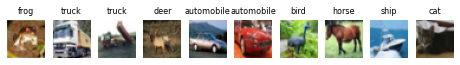

In [5]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=8)
plt.show()

In [6]:
# X_data: scaling
X_train = X_train/255.
X_test = X_test/255.

In [7]:
# y_data: one hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [9]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [10]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [11]:
model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [12]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=100, batch_size=32, callbacks=[mc, es]
)

Epoch 1/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.8291 - accuracy: 0.3275
Epoch 1: val_loss improved from inf to 1.57518, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 19s 6ms/step - loss: 1.8283 - accuracy: 0.3278 - val_loss: 1.5752 - val_accuracy: 0.4279
Epoch 2/100
1246/1250 [============================>.] - ETA: 0s - loss: 1.5203 - accuracy: 0.4436
Epoch 2: val_loss improved from 1.57518 to 1.37906, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5201 - accuracy: 0.4439 - val_loss: 1.3791 - val_accuracy: 0.5075
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 1.3928 - accuracy: 0.4956
Epoch 3: val_loss improved from 1.37906 to 1.26986, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3927 - accuracy: 0.4958 - val_loss: 1.2699 - val_accuracy: 0.5547
Epoch 4/100
1240/1250 [=======================

In [13]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6556 - accuracy: 0.7814


[0.6556034684181213, 0.7814000248908997]

- 학습과정 시각화

In [14]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

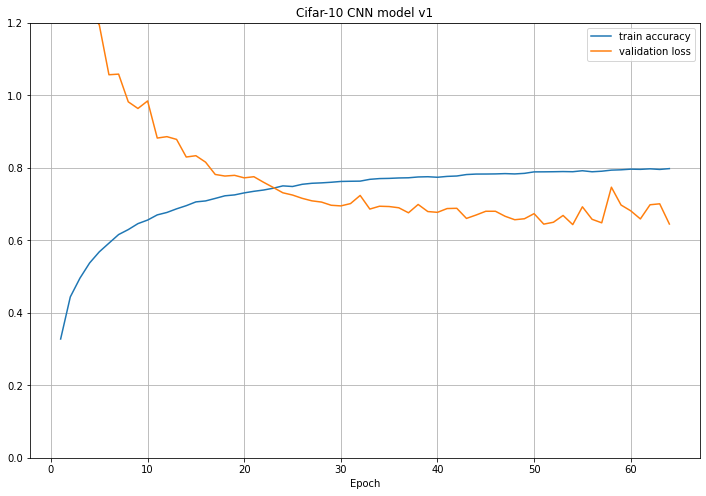

In [15]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim(0,1.2),
plt.xlabel('Epoch')
plt.title('Cifar-10 CNN model v1')
plt.show()